In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, acf, pacf

from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import precision_recall_curve, auc, confusion_matrix, ConfusionMatrixDisplay, PrecisionRecallDisplay

from sklearn.ensemble import IsolationForest

import keras
from keras import Model, Sequential, layers

In [2]:
normal = pd.read_csv(r"D:\ramy\Omnetrex\Heartbeat anomaly detection on time series\data\ptbdb_normal.csv")
print(normal.shape)
normal.head()

(4045, 188)


,1.000000000000000000e+00,9.003241658210754395e-01,3.585899472236633301e-01,5.145867168903350830e-02,4.659643396735191345e-02,1.268233358860015869e-01,1.333063244819641113e-01,1.191247999668121338e-01,1.106158867478370667e-01,1.130470037460327148e-01,...,0.000000000000000000e+00.56,0.000000000000000000e+00.57,0.000000000000000000e+00.58,0.000000000000000000e+00.59,0.000000000000000000e+00.60,0.000000000000000000e+00.61,0.000000000000000000e+00.62,0.000000000000000000e+00.63,0.000000000000000000e+00.64,0.000000000000000000e+00.65
0,1.000000,0.794681,0.375387,0.116883,0.000000,0.171923,0.283859,0.293754,0.325912,0.345083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.909029,0.791482,0.423169,0.186712,0.000000,0.007836,0.063032,0.077002,0.074957,0.077342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.478893,0.056760,0.064176,0.081289,0.072732,0.055619,0.048774,0.054478,0.041643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.867238,0.201360,0.099349,0.141336,0.120934,0.108516,0.096393,0.093436,0.100828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.948983,0.505265,0.004176,0.022513,0.059550,0.107298,0.110385,0.111293,0.116558,0.118192,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
abnormal = pd.read_csv(r"D:\ramy\Omnetrex\Heartbeat anomaly detection on time series\data\ptbdb_abnormal.csv")
print(abnormal.shape)
abnormal.head()

(10505, 188)


,9.322328567504882812e-01,8.696785569190979004e-01,8.861859440803527832e-01,9.296264052391052246e-01,9.087749719619750977e-01,9.339704513549804688e-01,8.010425567626953125e-01,7.497828006744384766e-01,6.872285008430480957e-01,6.350998878479003906e-01,...,0.000000000000000000e+00.117,0.000000000000000000e+00.118,0.000000000000000000e+00.119,0.000000000000000000e+00.120,0.000000000000000000e+00.121,0.000000000000000000e+00.122,0.000000000000000000e+00.123,0.000000000000000000e+00.124,0.000000000000000000e+00.125,1.000000000000000000e+00.1
0,1.000000,0.606941,0.384181,0.254237,0.223567,0.276836,0.253430,0.184826,0.153349,0.121872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.000000,0.951613,0.923963,0.853303,0.791859,0.734255,0.672043,0.685100,0.670507,0.667435,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.977819,0.899261,0.230129,0.032348,0.142329,0.223660,0.328096,0.367837,0.381701,0.389094,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.935618,0.801661,0.805815,1.000000,0.722741,0.480789,0.454829,0.319834,0.266874,0.308411,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.925265,0.433352,0.073620,0.079197,0.136643,0.182934,0.182934,0.182376,0.196877,0.203569,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [4]:
normal.describe().T

,count,mean,std,min,25%,50%,75%,max
1.000000000000000000e+00,4045.0,0.979665,0.029063,0.782178,0.964454,1.000000,1.000000,1.000000
9.003241658210754395e-01,4045.0,0.711439,0.186376,0.121784,0.580160,0.726231,0.863610,1.000000
3.585899472236633301e-01,4045.0,0.311665,0.183478,0.000000,0.164109,0.303182,0.436192,0.985955
5.145867168903350830e-02,4045.0,0.119592,0.110466,0.000000,0.028717,0.092677,0.187659,0.910798
4.659643396735191345e-02,4045.0,0.088618,0.075767,0.000000,0.027734,0.079580,0.134871,0.846591
...,...,...,...,...,...,...,...,...
0.000000000000000000e+00.61,4045.0,0.000895,0.015313,0.000000,0.000000,0.000000,0.000000,0.483471
0.000000000000000000e+00.62,4045.0,0.000454,0.010835,0.000000,0.000000,0.000000,0.000000,0.371502
0.000000000000000000e+00.63,4045.0,0.000474,0.011203,0.000000,0.000000,0.000000,0.000000,0.376668
0.000000000000000000e+00.64,4045.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


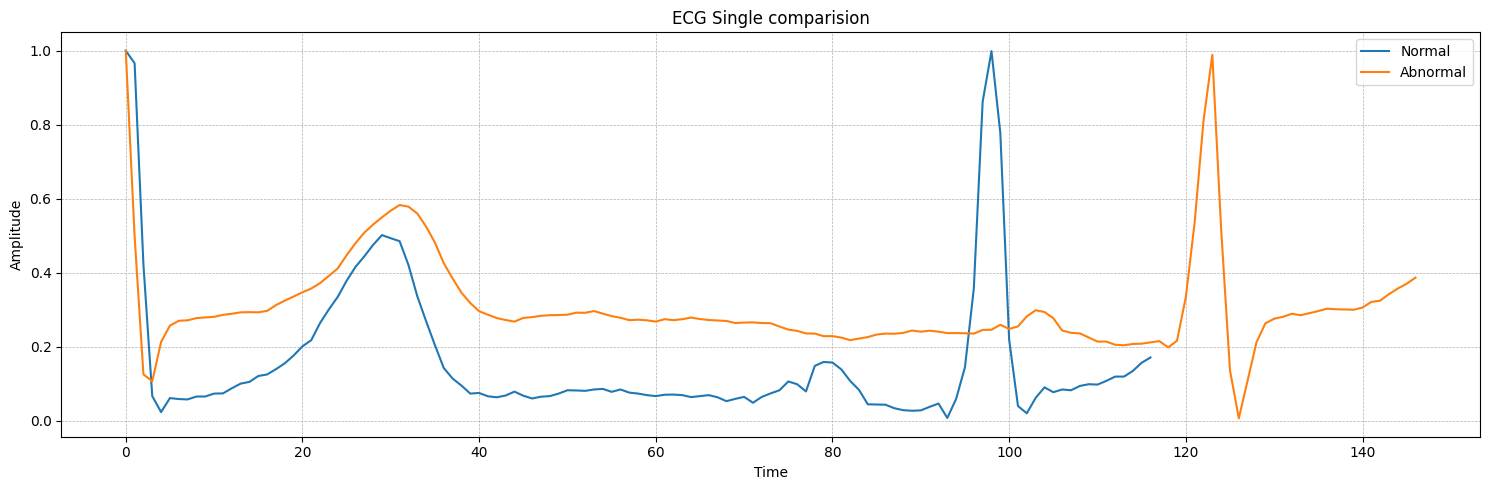

In [5]:
sample_normal = normal.iloc[:, :-1].sample(1).values.flatten()
sample_normal = [s for s in sample_normal if s > 0]

sample_abnormal = normal.iloc[:, :-1].sample(1).values.flatten()
sample_abnormal = [s for s in sample_abnormal if s > 0]

plt.figure(figsize=(15, 5))
plt.plot(sample_normal, label="Normal")
plt.plot(sample_abnormal, label="Abnormal")
plt.title("ECG Single comparision")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True, lw=0.5, linestyle="--")
plt.tight_layout()
plt.savefig(
    r"D:\ramy\Omnetrex\Heartbeat anomaly detection on time series\images\ECG Single comparision.png"
)
plt.show()

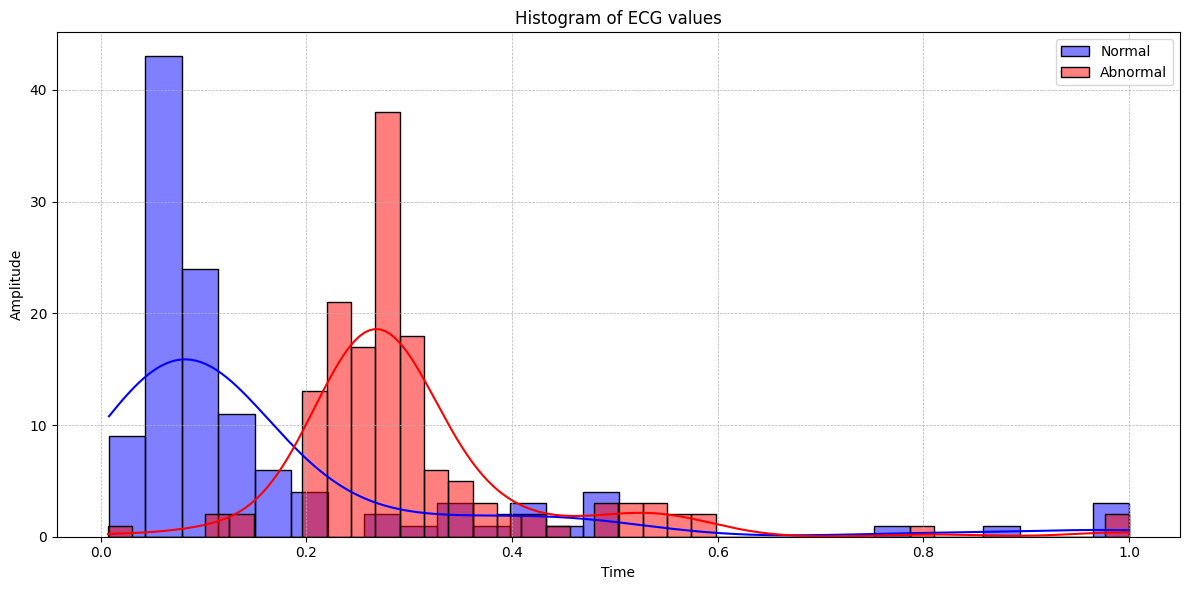

In [6]:
plt.figure(figsize=(12, 6))
sns.histplot(
    sample_normal,
    kde=True,
    color="blue",
    label="Normal",
)
sns.histplot(
    sample_abnormal,
    kde=True,
    color="red",
    label="Abnormal",
)
plt.title("Histogram of ECG values")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True, lw=0.5, linestyle="--")
plt.tight_layout()
plt.savefig(
    r"D:\ramy\Omnetrex\Heartbeat anomaly detection on time series\images\Histogram of ECG values.png"
)
plt.show()

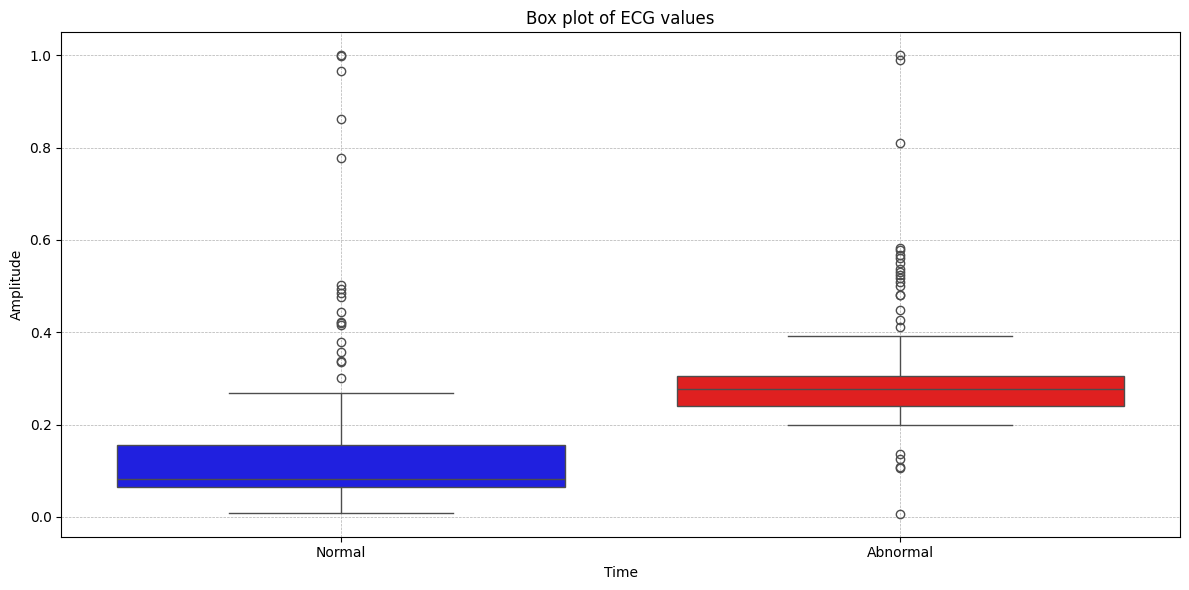

In [7]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=[sample_normal, sample_abnormal],
    palette=["blue", "red"],
)
plt.xticks([0, 1], ["Normal", "Abnormal"])
plt.title("Box plot of ECG values")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.grid(True, lw=0.5, linestyle="--")
plt.tight_layout()
plt.savefig(
    r"D:\ramy\Omnetrex\Heartbeat anomaly detection on time series\images\Box plot of ECG values.png"
)
plt.show()

## **Decomposition**
**Decomposition in Time Series Analysis**

Time series decomposition involves breaking down a time series into several components to better understand its structure and behavior.

The main components are:

* **Trend:** The long-term progression or direction in the data.
* **Seasonality:** The repeating short-term cycle in the series.
* **Residual:** The remaining part after removing the trend and seasonality, which represents random noise or irregular patterns.

Interpreting Decomposition for Heart Beat

* **Trend:** Helps identify whether the heart's electrical activity is increasing or decreasing over time.
* **Seasonality:** May reveal periodic cycles, like regular heartbeats.
* **Residual:** Indicates anomalies or noise after removing trend and seasonality.

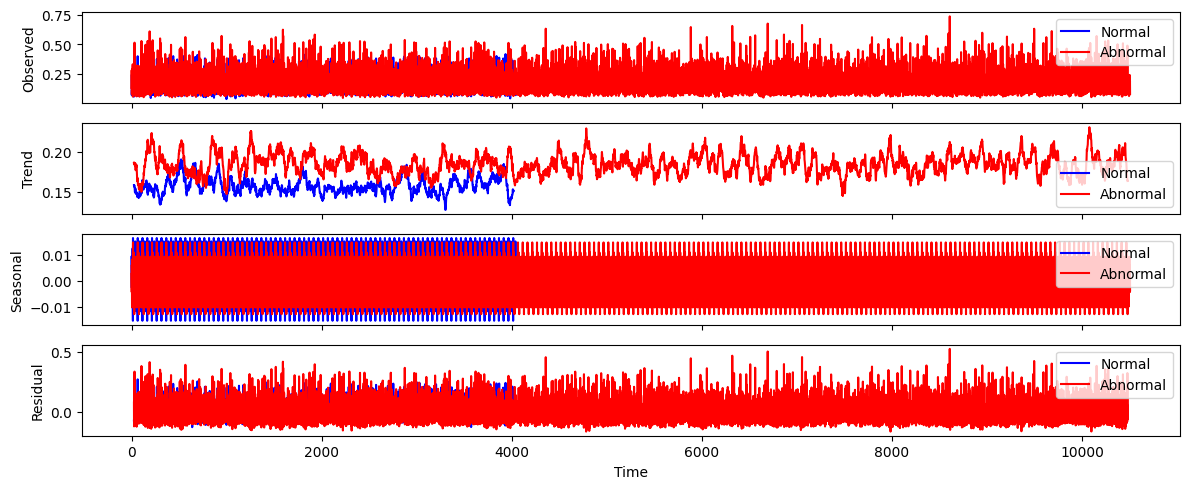

In [11]:
# For decomposition, we need a continuous segment of the time series data
# Assuming 'value' column represents the ECG signal

normal["value"] = normal.mean(axis=1)
abnormal["value"] = abnormal.mean(axis=1)

# Decompose the time series
decomposition_normal = seasonal_decompose(normal["value"], period=50, model="additive")
decomposition_abnormal = seasonal_decompose(
    abnormal["value"], period=50, model="additive"
)

# Plot the decomposition results
fig, axes = plt.subplots(4, 1, figsize=(12, 5), sharex=True)

# Observed
axes[0].plot(decomposition_normal.observed, color="blue", label="Normal")
axes[0].plot(decomposition_abnormal.observed, color="red", label="Abnormal")
axes[0].set_ylabel("Observed")
axes[0].legend()

# Trend
axes[1].plot(decomposition_normal.trend, color="blue", label="Normal")
axes[1].plot(decomposition_abnormal.trend, color="red", label="Abnormal")
axes[1].set_ylabel("Trend")
axes[1].legend()

# Seasonal
axes[2].plot(decomposition_normal.seasonal, color="blue", label="Normal")
axes[2].plot(decomposition_abnormal.seasonal, color="red", label="Abnormal")
axes[2].set_ylabel("Seasonal")
axes[2].legend()

# Residual
axes[3].plot(decomposition_normal.resid, color="blue", label="Normal")
axes[3].plot(decomposition_abnormal.resid, color="red", label="Abnormal")
axes[3].set_ylabel("Residual")
axes[3].legend()

axes[3].set_xlabel("Time")

plt.tight_layout()
plt.show()

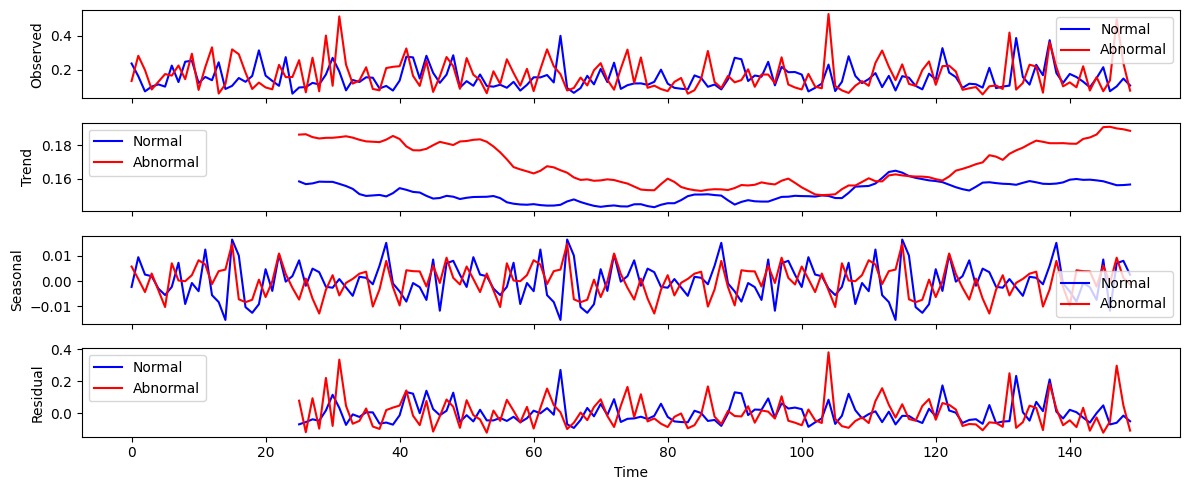

In [13]:
# Decompose the time series
decomposition_normal = seasonal_decompose(normal["value"], period=50, model="additive")
decomposition_abnormal = seasonal_decompose(
    abnormal["value"], period=50, model="additive"
)

# Plot the decomposition results for a segment
segment = slice(0, 150)  # Adjust the segment as needed

fig, axes = plt.subplots(4, 1, figsize=(12, 5), sharex=True)

# Observed
axes[0].plot(decomposition_normal.observed[segment], color="blue", label="Normal")
axes[0].plot(decomposition_abnormal.observed[segment], color="red", label="Abnormal")
axes[0].set_ylabel("Observed")
axes[0].legend()

# Trend
axes[1].plot(decomposition_normal.trend[segment], color="blue", label="Normal")
axes[1].plot(decomposition_abnormal.trend[segment], color="red", label="Abnormal")
axes[1].set_ylabel("Trend")
axes[1].legend()

# Seasonal
axes[2].plot(decomposition_normal.seasonal[segment], color="blue", label="Normal")
axes[2].plot(decomposition_abnormal.seasonal[segment], color="red", label="Abnormal")
axes[2].set_ylabel("Seasonal")
axes[2].legend()

# Residual
axes[3].plot(decomposition_normal.resid[segment], color="blue", label="Normal")
axes[3].plot(decomposition_abnormal.resid[segment], color="red", label="Abnormal")
axes[3].set_ylabel("Residual")
axes[3].legend()

axes[3].set_xlabel("Time")

plt.tight_layout()
plt.show()

**Analyzing the Seasonality Graph**

Looking at the provided seasonality graph of normal and abnormal heartbeat data:

* **Seasonal Patterns:** Both the normal (blue) and abnormal (red) signals exhibit repeating patterns, suggesting the presence of seasonality.

* **Visual Analysis:** The peaks and troughs repeat at regular intervals, indicating that both datasets have seasonal components.
Interpretation
* **Seasonality in ECG Data:** The presence of seasonality in heartbeat data can be linked to the natural rhythm of the heartbeats. This is normal and expected in biological signals.

**Analyzing the Trend Component**

From the trend graph provided:

* **Normal ECG (Blue):** The trend remains relatively flat with minor fluctuations, indicating a stable baseline heart activity.
* **Abnormal ECG (Red):** The trend shows more pronounced fluctuations and higher values, indicating variability and potentially unstable heart activity over time.

**Interpretation**
* Presence of Trend: Both normal and abnormal ECG data exhibit trends. The normal ECG trend is more stable, while the abnormal ECG trend shows greater variability and higher values.
* Clinical Implication: A stable trend in normal ECG suggests consistent heart function, whereas the fluctuating trend in abnormal ECG may indicate underlying cardiac issues that require further investigation.

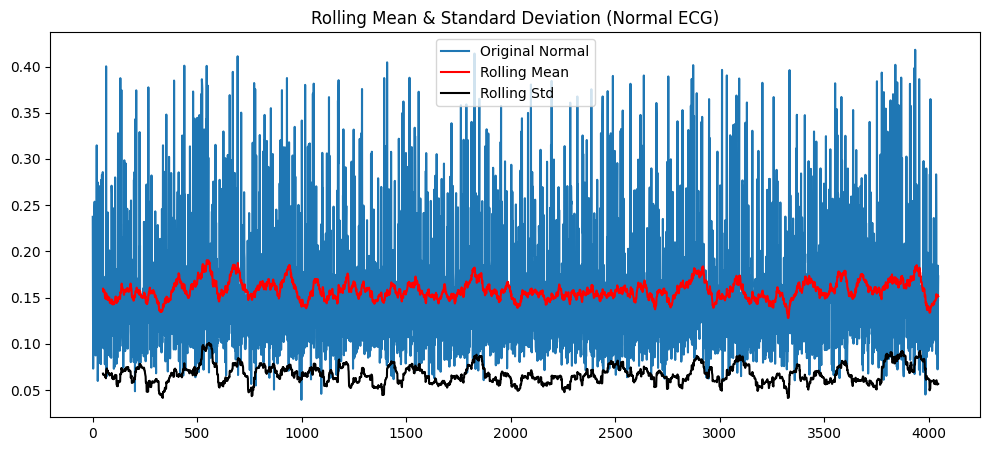

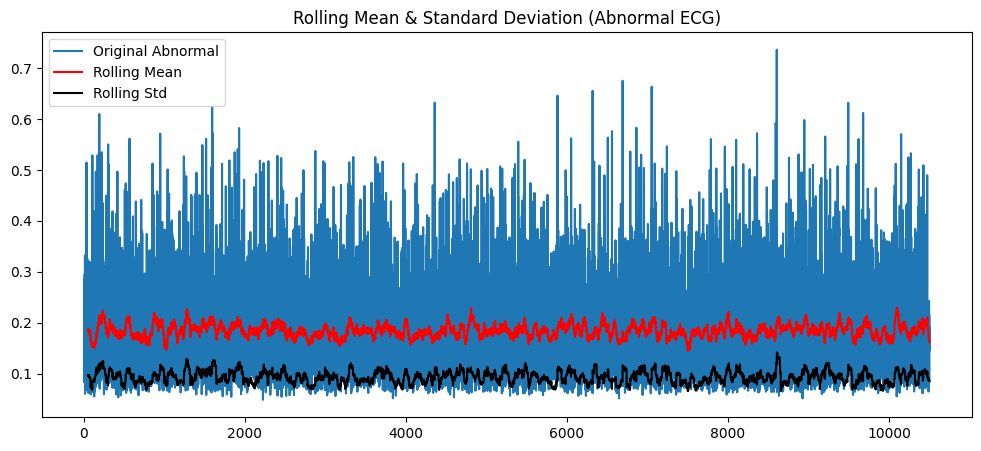

ADF Statistic (Normal): -62.62031787466004
p-value (Normal): 0.0
ADF Statistic (Abnormal): -102.07257011953996
p-value (Abnormal): 0.0


In [14]:
# Calculate rolling statistics
rolling_mean_normal = normal["value"].rolling(window=50).mean()
rolling_std_normal = normal["value"].rolling(window=50).std()

rolling_mean_abnormal = abnormal["value"].rolling(window=50).mean()
rolling_std_abnormal = abnormal["value"].rolling(window=50).std()

plt.figure(figsize=(12, 5))
plt.plot(normal["value"], label="Original Normal")
plt.plot(rolling_mean_normal, color="red", label="Rolling Mean")
plt.plot(rolling_std_normal, color="black", label="Rolling Std")
plt.title("Rolling Mean & Standard Deviation (Normal ECG)")
plt.legend()
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(abnormal["value"], label="Original Abnormal")
plt.plot(rolling_mean_abnormal, color="red", label="Rolling Mean")
plt.plot(rolling_std_abnormal, color="black", label="Rolling Std")
plt.title("Rolling Mean & Standard Deviation (Abnormal ECG)")
plt.legend()
plt.show()

# Perform Augmented Dickey-Fuller test
result_normal = adfuller(normal["value"])
result_abnormal = adfuller(abnormal["value"])

print("ADF Statistic (Normal):", result_normal[0])
print("p-value (Normal):", result_normal[1])

print("ADF Statistic (Abnormal):", result_abnormal[0])
print("p-value (Abnormal):", result_abnormal[1])

**Understanding Stationarity and Rolling Statistics**

Stationarity in a time series means that its statistical properties (mean, variance) do not change over time.

However, stationarity does not mean that the data points themselves do not change; rather, it means the overall distribution and behavior remain consistent.

Interpretation of the Graphs
From the provided graphs:

**Rolling Mean and Standard Deviation:**

**Normal ECG:** The rolling mean (red line) and rolling standard deviation (black line) fluctuate around a constant level, indicating the series is stationary. Despite the data points changing, the overall behavior remains consistent.

**Abnormal ECG:** Similarly, the rolling mean and standard deviation for the abnormal ECG also fluctuate but remain relatively stable, suggesting stationarity.

**ADF Test Results**
The Augmented Dickey-Fuller (ADF) test results further support this:

* *ADF Statistic (Normal):* -29.41, p-value: 0.0

* *ADF Statistic (Abnormal):* -31.08, p-value: 0.0
Both tests reject the null hypothesis of non-stationarity (p-value < 0.05), indicating that the time series for both normal and abnormal ECG signals are stationary.

**Summary**
* Stationary: Consistent statistical properties over time.
* Graphs: Rolling statistics help visualize this consistency.
* ADF Test: Confirms stationarity with significant results.

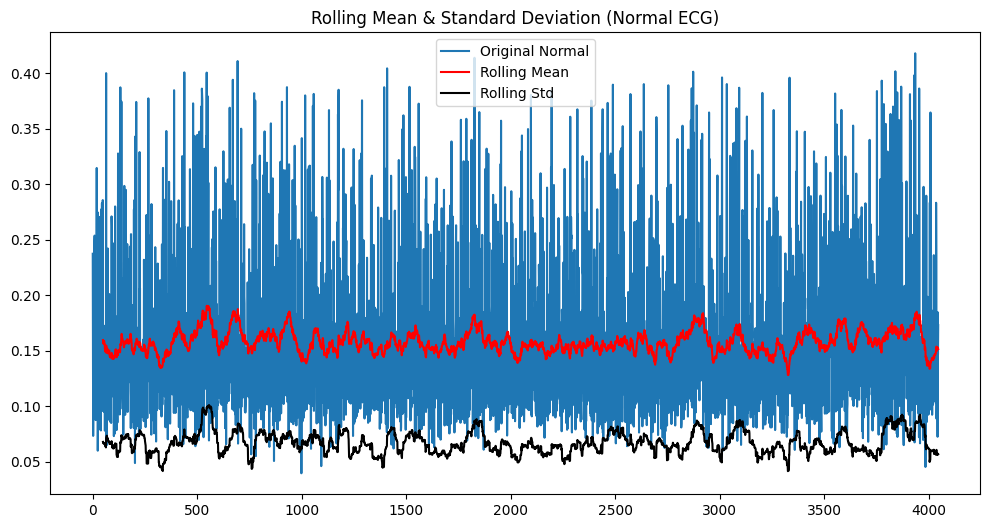

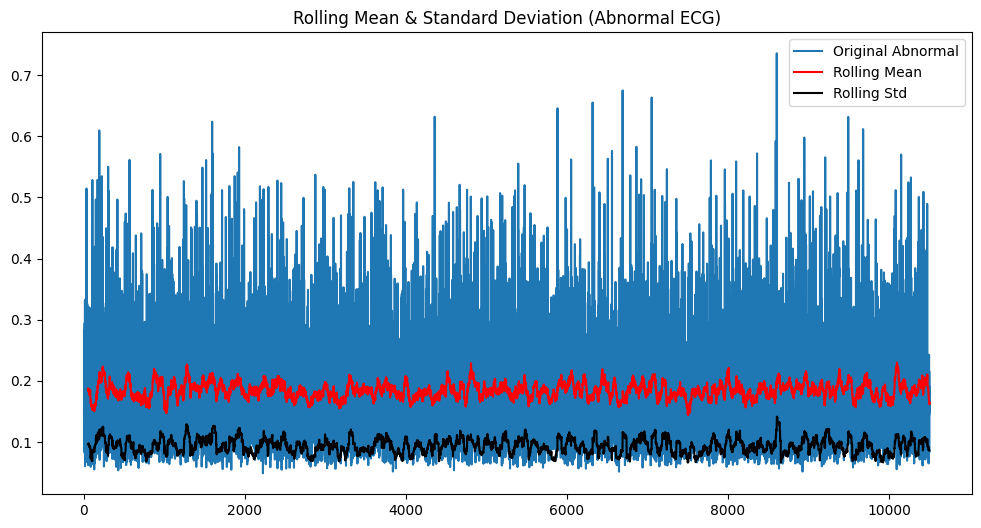

ADF Statistic (Normal): -62.62031787466004
p-value (Normal): 0.0
ADF Statistic (Abnormal): -102.07257011953996
p-value (Abnormal): 0.0


In [16]:
# Calculate rolling statistics
rolling_mean_normal = normal["value"].rolling(window=50).mean()
rolling_std_normal = normal["value"].rolling(window=50).std()

rolling_mean_abnormal = abnormal["value"].rolling(window=50).mean()
rolling_std_abnormal = abnormal["value"].rolling(window=50).std()

plt.figure(figsize=(12, 6))
plt.plot(normal["value"], label="Original Normal")
plt.plot(rolling_mean_normal, color="red", label="Rolling Mean")
plt.plot(rolling_std_normal, color="black", label="Rolling Std")
plt.title("Rolling Mean & Standard Deviation (Normal ECG)")
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(abnormal["value"], label="Original Abnormal")
plt.plot(rolling_mean_abnormal, color="red", label="Rolling Mean")
plt.plot(rolling_std_abnormal, color="black", label="Rolling Std")
plt.title("Rolling Mean & Standard Deviation (Abnormal ECG)")
plt.legend()
plt.show()

# Perform Augmented Dickey-Fuller test
result_normal = adfuller(normal["value"])
result_abnormal = adfuller(abnormal["value"])

print("ADF Statistic (Normal):", result_normal[0])
print("p-value (Normal):", result_normal[1])

print("ADF Statistic (Abnormal):", result_abnormal[0])
print("p-value (Abnormal):", result_abnormal[1])

Understanding Stationarity and Rolling Statistics
Stationarity in a time series means that its statistical properties (mean, variance) do not change over time.

However, stationarity does not mean that the data points themselves do not change; rather, it means the overall distribution and behavior remain consistent.

Interpretation of the Graphs
From the provided graphs:

Rolling Mean and Standard Deviation:
* Normal ECG: The rolling mean (red line) and rolling standard deviation (black line) fluctuate around a constant level, indicating the series is stationary. Despite the data points changing, the overall behavior remains consistent.
* Abnormal ECG: Similarly, the rolling mean and standard deviation for the abnormal ECG also fluctuate but remain relatively stable, suggesting stationarity.

* ADF Test Results
The Augmented Dickey-Fuller (ADF) test results further support this:

* ADF Statistic (Normal): -29.41, p-value: 0.0
* ADF Statistic (Abnormal): -31.08, p-value: 0.0

Both tests reject the null hypothesis of non-stationarity (p-value < 0.05), indicating that the time series for both normal and abnormal ECG signals are stationary.